# IMA 205 - TP ANN (part C) - OPTIONAL

## Coding a Multi-Layer Perceptron with Keras/Tensorflow

This part is optional, and you do not have to put your solution on eCampus. Regardless, I encourage you to do this part if you have spare time during the lab as it gives you a chance to familiarize yourself with the higher-level API of Keras. You will see that when the task is straightforward and involves only pre-existing building blocks, implementing it via Keras is very fast.

Original Author : Alasdair Newson

Adapted by Loic Le Folgoc. If you have questions, you can contact me at loic.lefolgoc@telecom-paris.fr

In the second part of this TP, we will be looking at the same Multi-Layer Perceptron (MLP) practical work, using Keras (https://keras.io/)

We will be using the following packages :
   
   - Scikit-learn (http://scikit-learn.org/)
   - Keras (https://keras.io/)

The following commands will make sure that you have all the necessary packages

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import pdb

import sklearn  # scikit-learn
import keras

from keras import layers
print(keras.__version__)

3.1.1


In [2]:
# This is the backend used by Keras by default:
keras.backend.backend()

'tensorflow'

# 1 - Multi-Layer Perceptron with Keras

## Introduction to Keras

Keras is a high-level, deep learning API originally written by François Chollet and now developed by Google for implementing neural networks. Like Pytorch, it provides automatic differentiation so that the user does not have to determine gradients manually, which can be extremely long even for simple networks, as you have seen in the previous lab.

Previously, Keras was a high-level API using Tensorflow as a backend. Tensorflow is a library written by Google which also allows implementation of deep neural networks. Previously, Tensorflow required a strict separation between the creation (declaration) of variables and their execution (giving a numerical value, using the ```Session``` function). With Keras and Tensorflow 2, this separation has been removed, and the language has become simpler, in particular for creating and training networks.

Since Keras 3, Keras can now be used on top of any backend in a transparent manner: JAX, Pytorch, or Tensorflow. By default, it still uses Tensorflow (as in our code below): but you will notice the code itself makes no explicit reference to Tensorflow.


## Creating a network

To create a network, there are two (main) methods :

### Creating a model using the Sequential API

Keras has a simple way of adding layers to create a neural network. First, you can indicate to Keras that the model is 'sequential' (a simple model, with not many tweaks). For this, you can use the following function :
- ```model = keras.Sequential()```

After this, you can add layers with the function.

- ```model.add()```

You can then use the ```layers.Dense``` and ```Activation``` functions to specify different layer types.  __Note that in the case of this approach, you will have to specify the input image size in the first layer of the network, inside the first layer function.__ So, for example, if the first layer is a dense layer with a relu activation, with n_out output neurons, and n_input neurons :

- `model = keras.Sequential()`
- `model.add(layers.Dense(n_out,activation,input_shape=(n_in,),activation='relu'))`

Otherwise, the network does not know how many weights to create. __Be careful of this special case (the first layer)__.

Notice that here, the activation is simply an argument of the `Dense` layer.<br>

Alternatively, like in Pytorch, we can pass the layers as arguments to `Sequential`: `model = keras.Sequential([layers.Dense(...),layers.Dense(...)])`.

### Creating a model using the standard API

Otherwise, another approach to creating the model is to explicitly create the input variable, and just cascade the different functions, as in Tensorflow. So, for the same example, we would have :

- `input = keras.Input(shape=(n_in,))`
- `output = layers.Dense(n_in,n_out,activation='relu')(input)`
- `model = keras.Model(input, output)`


For now, let's use the Sequential API (however, if you want to try the standard API, go ahead).

# MLP with Keras : Architecture

We are now going to create an MLP with Keras. We will start with an MLP with one hidden layer. The network should consist of the following operations, in the following order :

- Fully connected layer, with 50 output neurons
- ReLU activation
- Fully connected layer, with 1 output neuron (because we have a binary classification problem)
- Sigmoid output activation

We are going to be solving a binary classification problem, so the output of the network should be a scalar between 0 and 1 (thus the last Sigmoid activation function).

The loss function should be defined as the binary cross-entropy between the predicted class and the true class

# Training and testing a network

Tensorflow allows the easy training of a network with the following functions :

- `model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate))` : create the loss function and define the optimizer used. This function can do many other useful things (such as specifying different metrics to look at the model's performance e.g., with the argument: `metrics=["accuracy"]`)
- `model.fit(...)` : train the model
- `model.evaluate(...)` : test the model
- `model.predict(...)` : carry out a simple forward pass on the model

# Load data

First, we load the data.

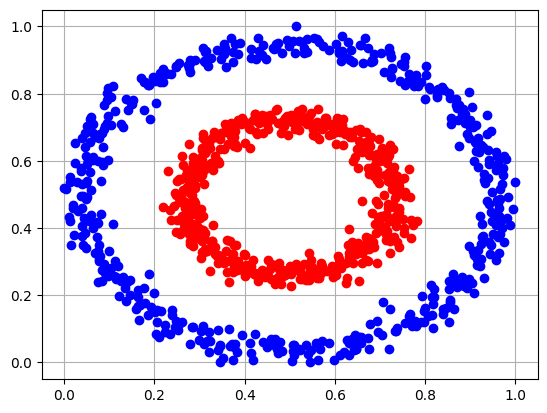

In [3]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X, Y = datasets.make_circles(n_samples=1000, noise=0.05, factor=0.5)
X = MinMaxScaler().fit_transform(X)

#show data in plot
plt.plot(X[Y == 1, 0], X[Y == 1, 1], 'ro')
plt.plot(X[Y == 0, 0], X[Y == 0, 1], 'bo')
plt.grid('on')

We are now going to define some useful auxillary functions.

First, a function that shows the decision boundary of our network. This works only for 2D input data

In [4]:
# THIS CODE IS GIVEN

def plot_decision_function_2d(model_mlp, X, Y):
   # create a mesh to plot in
    h = .02  # step size in the mesh
    offset = 0.1
    x_min, x_max = X[:, 0].min() - offset, X[:, 0].max() + offset
    y_min, y_max = X[:, 1].min() - offset, X[:, 1].max() + offset
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = model_mlp.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z<0.5
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.plot(X[Y == 1, 0], X[Y == 1, 1], 'yo')
    plt.plot(X[Y == 0, 0], X[Y == 0, 1], 'ko')

    plt.title("Decision surface")
    plt.axis('tight')

## CREATING AND TRAINING THE MODEL

We are now ready to create our network with Keras and to carry out training on our training dataset.

In [5]:
# FILL IN CODE BY STUDENTS IN THIS SECTION

# We split up the data into training and test data, using a function from Scikit-learn :
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
print(X_train.shape)

# Layer sizes
n_input = X.shape[1]  # Number of input features
n_hidden = 50  # Number of neurons in the hidden layer
n_output = 1 # Number of output neurons

# create the model (using the sequential API)

model_mlp = keras.Sequential([
    layers.Dense(n_hidden, input_dim=n_input, activation='relu'),  # Hidden layer
    layers.Dense(n_output, activation='sigmoid')  # Output layer
])   # FILL IN STUDENTS

# create the loss and optimiser
learning_rate = 0.01
model_mlp.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(learning_rate = learning_rate), 
                  metrics=['accuracy'])  # TO FILL IN

# Run optimisation algorithm
n_epochs = 30
batch_size = 64

print('Training')
model_mlp.fit(X_train, Y_train, epochs=n_epochs, batch_size=batch_size) # TO FILL IN

print('Testing')
model_mlp.evaluate(X_test, Y_test, verbose=2) # TO FILL IN


(850, 2)


C:\Users\lmcastanedame\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training
Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4898 - loss: 0.7029
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5159 - loss: 0.7002 
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4832 - loss: 0.7019 
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5219 - loss: 0.6985 
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5042 - loss: 0.6993 
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5183 - loss: 0.6979 
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5161 - loss: 0.6990 
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5349 - loss: 0.6973 
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5116 - loss: 0.6997 
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5191 - loss: 0.6991 
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5459 - loss: 0.6974 
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

[0.6909535527229309, 0.6800000071525574]

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


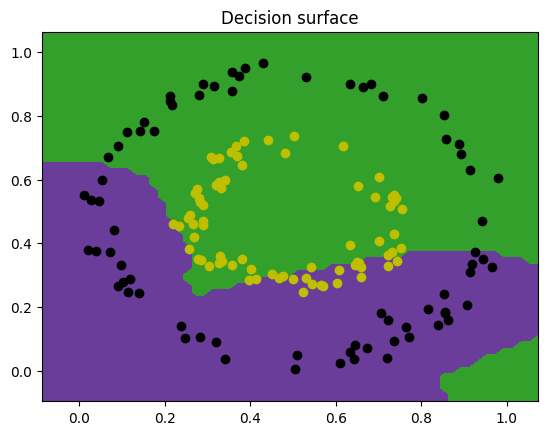

In [6]:
plot_decision_function_2d(model_mlp, X_test, Y_test)

# 2 - MLP with several hidden layers, on MNIST

We are now going to create an MLP with several hidden layers. We are going to use a more complicated dataset : the MNIST dataset, which contains images of handwritten digits. There are 10 classes, one for each digit.

We are going to implement the following architecture :

- Fully connected layer
- Relu activation
- Fully connected layer
- Relu activation
- Fully connected layer
- Relu activation
- Fully connected layer
- Softmax output activation

__IMPORTANT Note__ The sigmoid layer has been replaced by a softmax layer (at the end). This is normal, since we have a multi-class problem. __However, this differs from our Pytorch implementation, because Pytorch includes the softmax in the cross-entropy loss, unlike Keras.__


First, we load the MNIST dataset.

In [7]:
# Import MNIST data
mnist = keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

Y_train = keras.utils.to_categorical(y_train)  # in order to convert y to a matrix with (num_examples, num_classes) (one-hot encoding)
Y_test = keras.utils.to_categorical(y_test)  # in order to convert y to a matrix with (num_examples, num_classes) (one-hot encoding)

# reshape the input images : flatten the last two dimensions
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))


Finally, fill in the following code to create and train your MLP

In [8]:

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_hidden_3 = 128 # 3rd layer number of neurons

n_input = X_train.shape[1]
n_classes = Y_train.shape[1] # MNIST total classes (0-9 digits)

# TO CODE BY STUDENTS


model_mlp_multi_layer = keras.Sequential([
    layers.Dense(n_hidden_1, input_shape=(n_input,), activation='relu'),
    layers.Dense(n_hidden_2, activation='relu'),
    layers.Dense(n_hidden_3, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# create the loss and optimiser, use keras.losses.categorical_crossentropy in loss
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model_mlp_multi_layer.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Run optimisation algorithm
n_epochs = 20
batch_size = 64

print('Training')
model_mlp_multi_layer.fit(X_train, Y_train, epochs=n_epochs, batch_size=batch_size)

print('Testing')
model_mlp_multi_layer.evaluate(X_test, Y_test, verbose=2)

C:\Users\lmcastanedame\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training
Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8278 - loss: 3.5963
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9468 - loss: 0.2053
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9632 - loss: 0.1273
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9673 - loss: 0.1148
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9703 - loss: 0.1009
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9730 - loss: 0.0926
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9779 - loss: 0.0752
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9793 - loss: 0.0702
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9806 - loss: 0.0637
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9831 - loss: 0.0578
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9840 - loss: 0.0545
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8

[0.12906913459300995, 0.9778000116348267]

In [9]:
# THIS CODE IS GIVEN

def test_mnist_images(model_mlp_multi_layer,X_test):
  plt.figure(figsize=(10, 6))
  for idx in range(0,10):
      plt.subplot(2, 5, idx+1)
      rand_ind = np.random.randint(0,X_test.shape[0])
      plt.imshow(np.reshape(X_test[rand_ind,:],(28,28)),cmap='gray')
      # get prediction
      model_prediction = np.argmax(model_mlp_multi_layer.predict(np.expand_dims( X_test[rand_ind,:], axis=0)),axis=1)
      plt.title(int(model_prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


C:\Users\lmcastanedame\AppData\Local\Temp\ipykernel_19556\153462774.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(model_prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


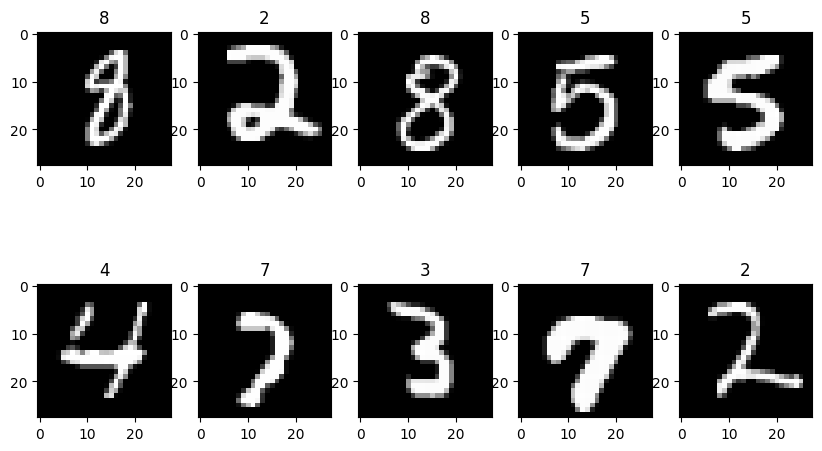

In [10]:
test_mnist_images(model_mlp_multi_layer,X_test)

You may observe some difficulties in getting good performance in this case. For me, this was much more obvious here than in the Pytorch implementation for some reason (maybe different implementation choices: in the initialization of the layers, the optimizer, etc.). To improve training, we can turn to __regularisation__.

## BATCH NORMALISATION

One approach to improving the convergence of neural network training which we have seen during the lesson is known as batch normalisation, which we have seen during the lesson. This can be implemented very simply in Tensorflow by adding the following layer :

- ```layers.BatchNormalization()```

Change your model below, and implement this using your code above

In [12]:
# TO CODE BY STUDENTS

# create the model (using the sequential API)
model_mlp_multi_layer = keras.Sequential([
    layers.Dense(n_hidden_1, input_shape=(n_input,)),
    layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    layers.Dense(n_hidden_2),
    layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    layers.Dense(n_hidden_3),
    layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    layers.Dense(n_classes),
    layers.BatchNormalization(),
    keras.layers.Activation('softmax')
])

# create the loss and optimiser, use keras.losses.categorical_crossentropy in loss
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model_mlp_multi_layer.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Run optimisation algorithm
n_epochs = 20
batch_size = 64

print('Training')
model_mlp_multi_layer.fit(X_train, Y_train, epochs=n_epochs, batch_size=batch_size)

print('Testing')
model_mlp_multi_layer.evaluate(X_test, Y_test, verbose=2)

C:\Users\lmcastanedame\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training
Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8948 - loss: 0.5671
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9696 - loss: 0.1706
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9784 - loss: 0.1035
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9833 - loss: 0.0738
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9867 - loss: 0.0568
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9879 - loss: 0.0475
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9901 - loss: 0.0392
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9925 - loss: 0.0297
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9931 - loss: 0.0263
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9939 - loss: 0.0228
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9949 - loss: 0.0200
Epoch 12/20
938/938 ━━━━━━━━

[0.0582633875310421, 0.9843999743461609]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


C:\Users\lmcastanedame\AppData\Local\Temp\ipykernel_19556\153462774.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(model_prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


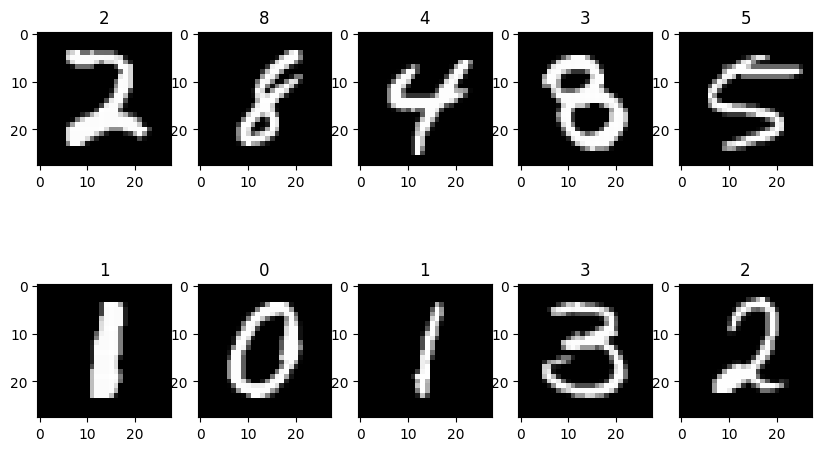

In [13]:
test_mnist_images(model_mlp_multi_layer,X_test)

__Question__: do you observe improved convergence ?

Batch normalization lead to faster convergence by normalizing the input layer by re-centering and re-scaling. This normalization often allows for higher learning rates and less careful initialization, both of which can accelerate the learning process. 

By normalizing the inputs to each layer, batch normalization helps maintain stability during training. It reduces the problem known as internal covariate shift, where the distribution of inputs to layers changes as the parameters of the previous layers change during training.

## Dropout

Often in the process of training neural networks, there is a difference between the training accuracy and the testing accuracy. This is the problem of overfitting. To alleviate this problem, we can turn to dropout:

`layers.Dropout(rate,...)`

where rate is the probability that an input neuron to a layer will get set to 0. You can do this in any layer. Use the previous architecture and try out the dropout. Set the dropout rate to 0.1 on the first layer as a test. Then try it out on all layers (you may not see a great difference here since the mnist database is relatively simple, this is just to show you how it is done)

In [15]:
dropout_rate = 0.1

# TO CODE BY STUDENTS
# create the model (using the sequential API)
model_mlp_multi_layer = keras.Sequential([
    layers.Dense(n_hidden_1, input_shape=(n_input,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(n_hidden_2),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(dropout_rate),  # Apply dropout to each layer as an example
    layers.Dense(n_hidden_3),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(n_classes),
    layers.BatchNormalization(),
    layers.Activation('softmax')
])

# create the loss and optimiser, use keras.losses.categorical_crossentropy in loss
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model_mlp_multi_layer.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Run optimisation algorithm
n_epochs = 20
batch_size = 64

print('Training')
model_mlp_multi_layer.fit(X_train, Y_train, epochs=n_epochs, batch_size=batch_size)

print('Testing')
model_mlp_multi_layer.evaluate(X_test, Y_test, verbose=2)

C:\Users\lmcastanedame\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training
Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8680 - loss: 0.6449
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9596 - loss: 0.2076
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9674 - loss: 0.1414
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9743 - loss: 0.1063
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9793 - loss: 0.0831
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9840 - loss: 0.0637
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9833 - loss: 0.0609
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9855 - loss: 0.0536
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9876 - loss: 0.0441
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9884 - loss: 0.0399
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9901 - loss: 0.0334
Epoch 12/20
938/938 ━

[0.04908489063382149, 0.9861000180244446]

#### Documentation:

  - https://keras.io/
  - http://www.deeplearningbook.org/